# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# categorical_features = ['Traffic Situation', 'Day of the week']
# for feature in categorical_features:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=feature, data=df)
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.title(f'Count Plot of {feature}')
#     plt.show()

## Load the Data

In [170]:
df = pd.read_csv('/content/Traffic_Accidents.csv')
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [171]:
df.shape

(52000, 26)

In [172]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [173]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No'], dtype=object)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

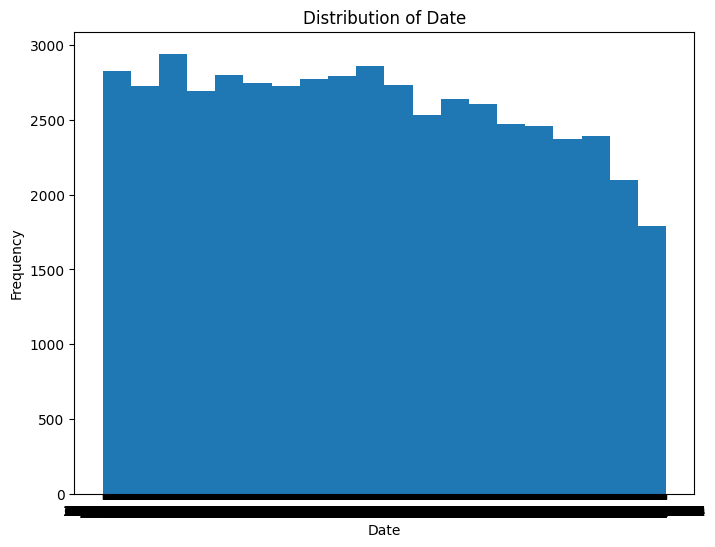

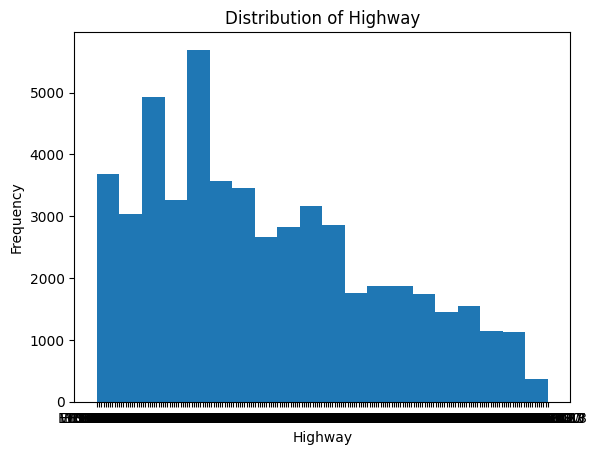

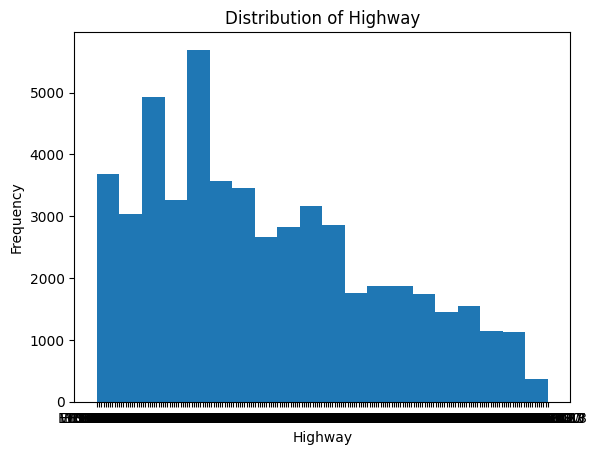

In [175]:
plt.figure(figsize=(8, 6))
plt.hist(df['Date'], bins=20)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title(f'Distribution of Date')
plt.show()

plt.hist(df['Local_Authority_(Highway)'], bins=20)
plt.xlabel('Highway')
plt.ylabel('Frequency')
plt.title(f'Distribution of Highway')
plt.show()

plt.hist(df['Local_Authority_(Highway)'], bins=20)
plt.xlabel('Highway')
plt.ylabel('Frequency')
plt.title(f'Distribution of Highway')
plt.show()


In [176]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present', nan,
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

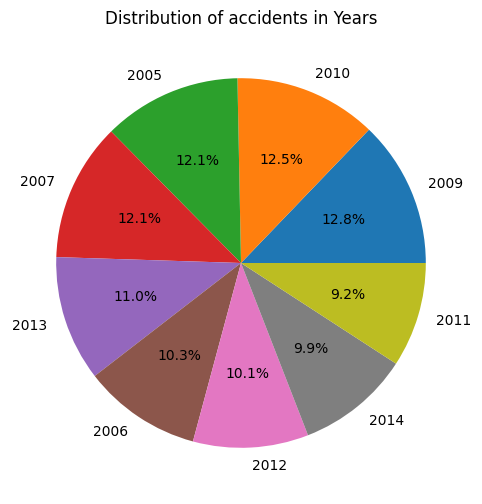

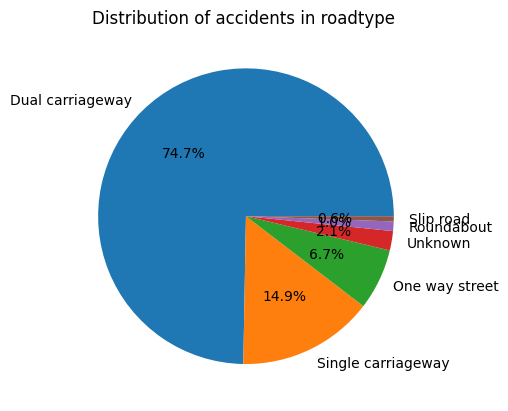

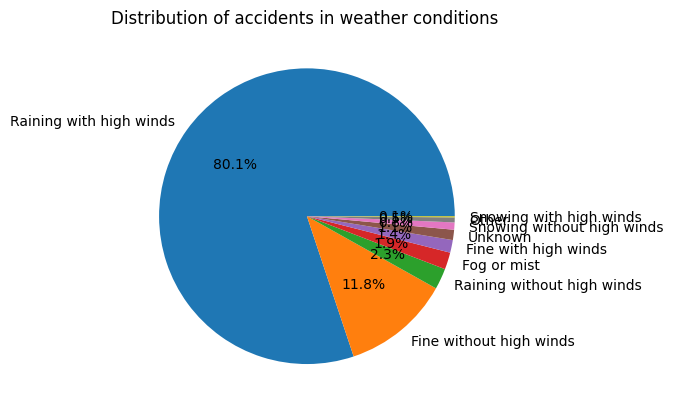

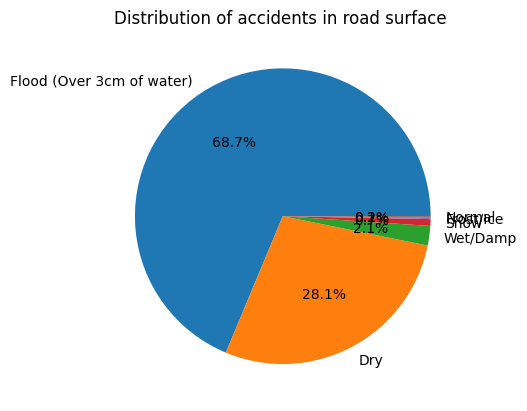

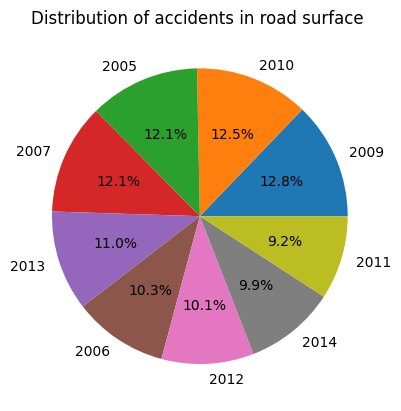

In [177]:
plt.figure(figsize=(10, 6))
plt.pie(df['Year'].value_counts(), labels=df['Year'].unique(), autopct='%1.1f%%')
plt.title('Distribution of accidents in Years')
plt.show()

#Road_Type
plt.pie(df['Road_Type'].value_counts(), labels=df['Road_Type'].unique(), autopct='%1.1f%%')
plt.title('Distribution of accidents in roadtype ')
plt.show()

#Light_Conditions
plt.pie(df['Weather_Conditions'].value_counts(), labels=df['Weather_Conditions'].unique(), autopct='%1.1f%%')
plt.title('Distribution of accidents in weather conditions ')
plt.show()

plt.pie(df['Road_Surface_Conditions'].value_counts(), labels=df['Road_Surface_Conditions'].unique(), autopct='%1.1f%%')
plt.title('Distribution of accidents in road surface ')
plt.show()

#Year
plt.pie(df['Year'].value_counts(), labels=df['Year'].unique(), autopct='%1.1f%%')
plt.title('Distribution of accidents in road surface ')
plt.show()

In [178]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [179]:
#df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
#df.drop('Time', axis=1, inplace=True)
##df.dropna(inplace=True)

In [180]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present', nan,
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [181]:
df['Urban_or_Rural_Area'].unique()

array([ 2.,  1., nan,  3.])

In [182]:
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(), inplace=True)

In [183]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3., nan,  4.,  9.,  7.,  8.,  5.,  6., 42., 14., 12.,
       10., 13., 24., 51., 18., 11., 23.])

In [184]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3., nan,  4.,  9.,  7.,  8.,  5.,  6., 42., 14., 12.,
       10., 13., 24., 51., 18., 11., 23.])

In [185]:
df.drop('Light_Conditions', axis=1, inplace=True)

In [186]:
df.drop('Number_of_Casualties', axis=1, inplace=True)

In [187]:
df.drop('Accident_Severity', axis=1, inplace=True)

In [188]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Number_of_Vehicles,0
Date,0
Day_of_Week,0
Local_Authority_(District),0
Local_Authority_(Highway),0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Number_of_Vehicles                           52000 non-null  int64  
 6   Date                                         52000 non-null  object 
 7   Day_of_Week                                  52000 non-null  int64  
 8   Local_Authority_(District)                   52000 non-null  int64  
 9   Local_Authority_(Highway)                    52000 non-null  object 
 10

In [190]:
df.drop('Pedestrian_Crossing-Physical_Facilities', axis=1, inplace=True)
df.drop('Pedestrian_Crossing-Human_Control',axis = 1 , inplace = True)


In [191]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Number_of_Vehicles,0
Date,0
Day_of_Week,0
Local_Authority_(District),0
Local_Authority_(Highway),0


In [192]:
object_values = ['Did_Police_Officer_Attend_Scene_of_Accident','Road_Surface_Conditions','Weather_Conditions','Road_Type','Local_Authority_(Highway)']
for feature in object_values:
  print(df[feature].unique)

<bound method Series.unique of 0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
51995    Yes
51996    Yes
51997    Yes
51998    Yes
51999    Yes
Name: Did_Police_Officer_Attend_Scene_of_Accident, Length: 52000, dtype: object>
<bound method Series.unique of 0        Flood (Over 3cm of water)
1                              Dry
2                              Dry
3                         Wet/Damp
4                              Dry
                   ...            
51995                          Dry
51996                          Dry
51997                     Wet/Damp
51998                     Wet/Damp
51999                          Dry
Name: Road_Surface_Conditions, Length: 52000, dtype: object>
<bound method Series.unique of 0           Raining with high winds
1           Fine without high winds
2           Fine without high winds
3        Raining without high winds
4           Fine without high winds
                    ...            
51995       Fine with

In [193]:
df.shape

(52000, 21)

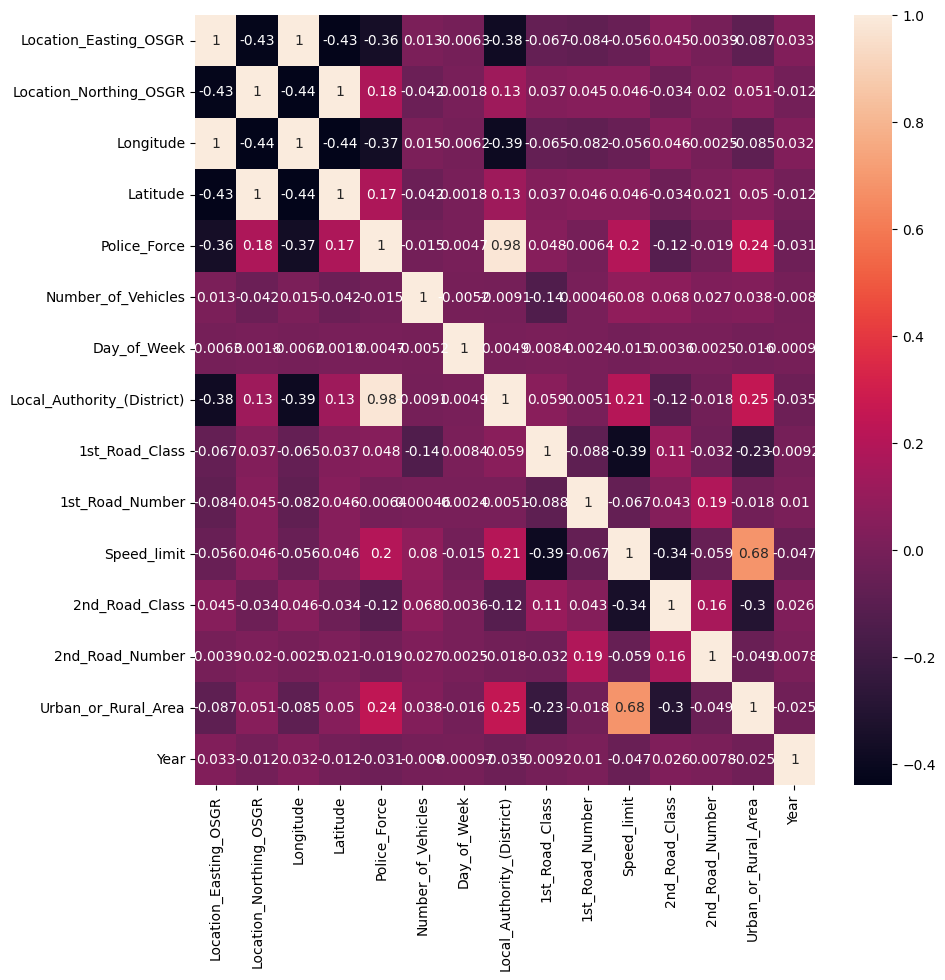

In [194]:
df_corr = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

In [195]:
df['Local_Authority_(Highway)'].unique()

array(['E10000011', 'E09000017', 'W06000014', 'E10000017', 'E06000021',
       'E10000018', 'E08000020', 'E08000022', 'S12000006', 'E06000010',
       'E08000030', 'E06000049', 'E08000034', 'E08000009', 'E06000034',
       'E08000036', 'E10000023', 'E09000008', 'E06000016', 'E08000029',
       'E09000010', 'W06000024', 'E08000011', 'E10000032', 'E10000015',
       'E10000019', 'E06000037', 'E10000030', 'E08000024', 'E09000032',
       'E08000003', 'E08000007', 'E09000011', 'E06000035', 'E10000020',
       'E06000031', 'S12000043', 'E08000031', 'E10000009', 'S12000036',
       'E10000034', 'E06000032', 'E10000016', 'E06000045', 'E10000014',
       'E10000003', 'E10000007', 'E06000051', 'E10000028', 'E08000010',
       'E06000036', 'E09000019', 'E06000019', 'E06000030', 'E06000033',
       'E09000016', 'E10000024', 'E08000032', 'E06000002', 'E10000029',
       'E08000026', 'E08000025', 'E09000006', 'E06000042', 'E06000052',
       'E09000003', 'S12000040', 'E09000023', 'E10000021', 'E090

In [196]:
#df.drop('Time', axis=1, inplace=True)
df['Local_Authority_(District)'].unique()

array([556,  26, 746,  84, 257, 363, 146, 148, 917, 228, 307, 129, 203,
       112, 462, 206, 182,  20, 364, 306,  32, 742,  90, 563, 433, 355,
       471, 517, 150,  10, 102, 109,   6, 544, 406,  85, 394, 926, 438,
       309, 645, 923, 400, 186, 270, 421, 539, 500, 496, 395, 543,  33,
       321, 322, 279, 251, 114, 554, 470,   3, 285, 633, 536, 460,  15,
       345, 200, 243, 415, 302, 300,  19, 479, 591,  30, 940,   7, 386,
       280, 256,   1,  28, 585, 351, 420, 570,   4, 139,  22,  18,  91,
       743, 290, 606, 128, 612, 184, 204, 514, 745, 252, 605, 937, 624,
       929,  13,  40, 354, 215, 938, 437,  27, 623, 477, 538, 911,  31,
        76, 213, 340, 100, 454, 541, 918, 531,  92, 583, 558, 511, 346,
       286, 341,  11, 255, 277, 513, 211, 407, 516, 596, 181, 185, 390,
       931,  75, 463, 384, 750, 565, 608, 130, 533, 147, 586, 601, 559,
       274, 481, 328,  60, 939,  79, 935, 258, 413, 240, 564, 510,  21,
       126, 123, 452,  16, 492, 540, 635,  83, 934, 915, 634, 25

In [197]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [198]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [199]:
df['1st_Road_Class'].unique()

array([3, 4, 6, 5, 1, 2])

In [200]:
df['2nd_Road_Class'].unique()

array([-1,  6,  3,  5,  4,  1,  2])

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Number_of_Vehicles                           52000 non-null  int64  
 6   Date                                         52000 non-null  object 
 7   Day_of_Week                                  52000 non-null  int64  
 8   Local_Authority_(District)                   52000 non-null  int64  
 9   Local_Authority_(Highway)                    52000 non-null  object 
 10

In [202]:
df.drop('Road_Type', axis=1, inplace=True)

In [203]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No'], dtype=object)

In [204]:
df['Local_Authority_(Highway)'] = le.fit_transform(df['Local_Authority_(Highway)'])

In [205]:
df['Local_Authority_(Highway)'].unique()

array([130, 107, 196, 136,  20, 137,  74,  76, 153,   9,  84,  48,  88,
        63,  33,  90, 141,  98,  15,  83, 100, 205,  65, 149, 134, 138,
        36, 147,  78, 122,  57,  61, 101,  34, 139,  30, 182,  85, 129,
       176, 150,  31, 135,  44, 133, 125, 127,  50, 145,  64,  35, 109,
        18,  29,  32, 106, 142,  86,   1, 146,  80,  79,  96,  41,  51,
        93, 179, 113, 140, 123,  95, 128,  53,  91, 102,  47, 114,  94,
        66, 194, 148, 144,   6,  24,  89, 193,  23, 170, 132, 163, 121,
        73, 171,  99, 124, 174, 104,  72,  55, 131, 181,  67,  25,  17,
       103,  71, 165, 190,  42,  49,  75,  22, 143, 126, 172, 177,   0,
       119,  92,  52, 167, 152, 197, 188,   8, 185,  87,   7,  77,   3,
       195, 161,  97,  46,  54, 154,   5,  62, 112, 115,  43,  12,  70,
        69,  11, 186,  10,  82,  14, 160, 183, 159,  60, 117, 191, 175,
       192, 120, 108, 157,  81,  68, 178,  19, 204, 203, 173,  39, 116,
       118,   4, 198, 111, 199,  21,  38,  28,  16,  59,  13,  2

In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [207]:
df.drop('Did_Police_Officer_Attend_Scene_of_Accident', axis=1, inplace=True)

In [208]:
df.drop('Year', axis=1, inplace=True)

In [209]:
df.drop('Road_Surface_Conditions', axis = 1, inplace = True)

In [210]:
df.drop('Weather_Conditions', axis = 1 , inplace= True)

In [211]:
df.drop('Date', axis = 1 , inplace= True)

In [212]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Number_of_Vehicles,0
Day_of_Week,0
Local_Authority_(District),0
Local_Authority_(Highway),0
1st_Road_Class,0


In [213]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class',
       '2nd_Road_Number', 'Urban_or_Rural_Area'],
      dtype='object')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [214]:
from scipy import stats
df_no_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [215]:
df_no_outliers.shape

(48615, 15)

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [217]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)

# Applying PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Checking the shape of the reduced data
print(df_pca.shape)

(48615, 2)


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [218]:
# I have removed unneeded features with drop, as the goal of this clustering is analyze
#to the accidents based on their geographical location, some features that is unreleavent to locations were removed
# like Road_Type , Speed_Limit, Weather Conditions
# Number of casualties , number of Vehichles

#-------------------------------------------------------------------------------------

# Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
#        'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
#        'Number_of_Casualties', 'Date', 'Day_of_Week',
#        'Local_Authority_(District)', 'Local_Authority_(Highway)',
#        '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
#        '2nd_Road_Class', '2nd_Road_Number',
#        'Pedestrian_Crossing-Human_Control',
#        'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
#        'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
#        'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
#       dtype='object')

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

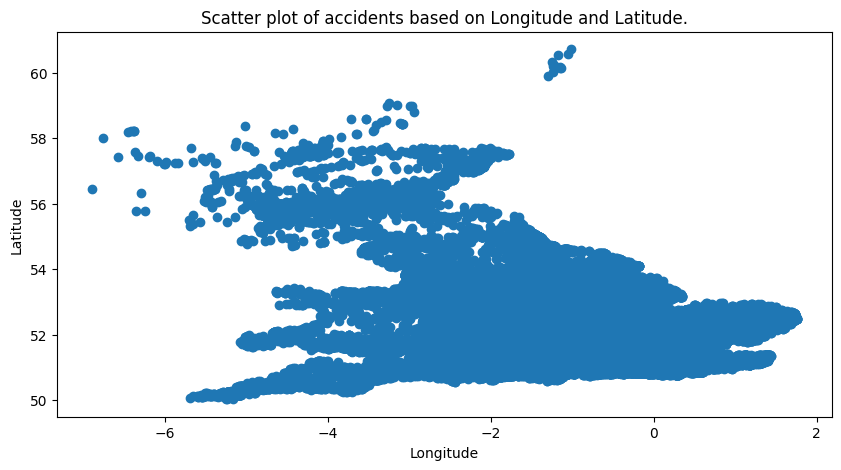

In [219]:
plt.figure(figsize=(10,5))
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of accidents based on Longitude and Latitude.')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

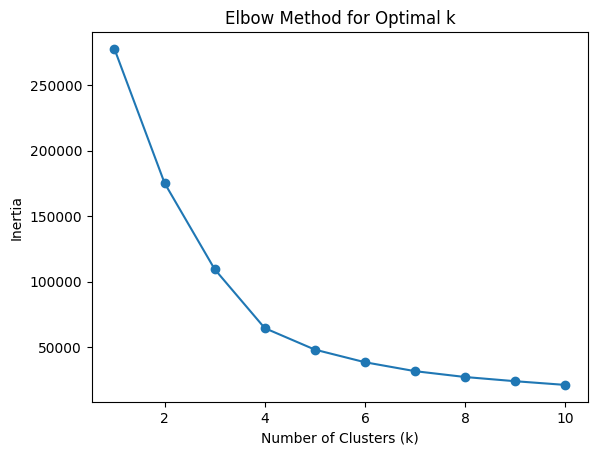

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [220]:

from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


optimal_k = 10

# Training the K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [221]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


silhouette_avg = silhouette_score(df_pca, cluster_assignments)
print("Silhouette Score:", silhouette_avg)





Silhouette Score: 0.4445338960478153


## Plot the data points with their predicted cluster center

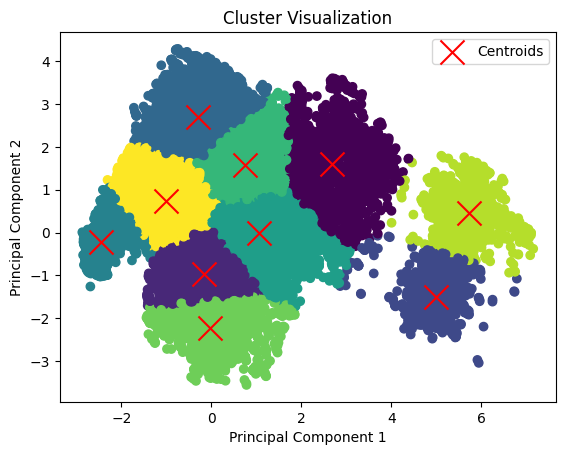

In [222]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* 1- The selections of my features was because the analyze goal and objective is geographical locations cluster
that is reason of selections of the features *

2- I Have determined the numbers of clusters through the elbow method


3- for the evaluation i have used the Silhouette Score it is specialized for measuring cluster quality

4- first and the most thing that should bd applied to the dataset is to select features carefully while analyzing the geographical locations, ICA Can applied instead of PCA